In [1]:
import matplotlib 
from matplotlib  import pyplot
import numpy as np
import matplotlib.pyplot as plt
import math
import csv, operator
import scipy.stats as st
from scipy.optimize import basinhopping
from numpy import random
import pandas as pd
from matplotlib.ticker import FuncFormatter
from scipy.optimize import curve_fit

In [2]:
Altura_agua_15 = np.loadtxt("Altura_agua-1.5/Altura-Agua-1.5.txt", comments='#')
Altura_agua_25 = np.loadtxt("Altura_agua-2.5/Altura-Agua-2.5.txt", comments='#')
Altura_agua_35 = np.loadtxt("Altura_agua-3.5/Altura-Agua-3.5.txt", comments='#')
Altura_agua_45 = np.loadtxt("Altura_agua-4.5/Altura-Agua-4.5.txt", comments='#')
Altura_agua_55 = np.loadtxt("Altura_agua-5.5/Altura-Agua-5.5.txt", comments='#')

ymax_15 = Altura_agua_15[:,1]
average_15 = round(sum(ymax_15) / float(len(ymax_15)), 3)
dev_15 = round(np.std(ymax_15, dtype=np.float64), 3)

agua_15 = Altura_agua_15[:,5]
average_altura_15 = round(sum(agua_15) / float(len(agua_15)), 3)
dev_altura_15 = round(np.std(agua_15, dtype=np.float64), 3)

ymax_25 = Altura_agua_25[:,1]
average_25 = round(sum(ymax_25) / float(len(ymax_25)), 3)
dev_25 = round(np.std(ymax_25, dtype=np.float64), 3)

agua_25 = Altura_agua_25[:,5]
average_altura_25 = round(sum(agua_25) / float(len(agua_25)), 3)
dev_altura_25 = round(np.std(agua_25, dtype=np.float64), 3)

ymax_35 = Altura_agua_35[:,1]
average_35 = round(sum(ymax_35) / float(len(ymax_35)), 3)
dev_35 = round(np.std(ymax_35, dtype=np.float64), 3)

agua_35 = Altura_agua_35[:,5]
average_altura_35 = round(sum(agua_35) / float(len(agua_35)), 3)
dev_altura_35 = round(np.std(agua_35, dtype=np.float64), 3)

ymax_45 = Altura_agua_45[:,1]
average_45 = round(sum(ymax_45) / float(len(ymax_45)), 3)
dev_45 = round(np.std(ymax_45, dtype=np.float64), 3)

agua_45 = Altura_agua_45[:,5]
average_altura_45 = round(sum(agua_45) / float(len(agua_45)), 3)
dev_altura_45 = round(np.std(agua_45, dtype=np.float64), 3)

ymax_55 = Altura_agua_55[:,1]
average_55 = round(sum(ymax_55) / float(len(ymax_55)), 3)
dev_55 = round(np.std(ymax_55, dtype=np.float64), 3)

agua_55 = Altura_agua_55[:,5]
average_altura_55 = round(sum(agua_55) / float(len(agua_55)), 3)
dev_altura_55 = round(np.std(agua_55, dtype=np.float64), 3)

average = [average_15, average_25, average_35, average_45, average_55]
dev = [dev_15, dev_25, dev_35, dev_45, dev_55]
agua = [average_altura_15, average_altura_25, average_altura_35, average_altura_45, average_altura_55]

caida_15 = Altura_agua_15[:,4]
caida_25 = Altura_agua_25[:,4]
caida_35 = Altura_agua_35[:,4]
caida_45 = Altura_agua_45[:,4]
caida_55 = Altura_agua_55[:,4]

average_caida = round(((sum(caida_15)/float(len(caida_15)))+(sum(caida_25)/float(len(caida_25)))+(sum(caida_35)/float(len(caida_35)))+(sum(caida_45)/float(len(caida_45)))+(sum(caida_55)/float(len(caida_55))))/5., 3)
promedios = [sum(caida_15)/float(len(caida_15)),sum(caida_25)/float(len(caida_25)),sum(caida_35)/float(len(caida_35)), sum(caida_45)/float(len(caida_45)), sum(caida_55)/float(len(caida_55))]
desviacion = round(np.std(promedios, dtype=np.float64), 3)

#masa_agua = [0.034,0.054,0.080,0.107,0.140]

print average_caida, desviacion


0.488 0.011


In [13]:
def recta(x, d, e):
    return  d*0.488*(x+0.006+0.001)/0.001 + e
poptrec, pcovrec = curve_fit(recta, [agua[0],agua[1],agua[2]], [average[0],average[1],average[2]], [1,1])
print(poptrec)


#def exponencial (x,a,b,c,d):
    #return a*0.488*(x+0.006+0.001)/0.001 - b*np.exp(c*x) + d
#poptexp, pcovexp = curve_fit(exponencial, masa_agua, average, [10,10,10,10])
#print(poptexp)

[ 0.1045082  -0.29566669]


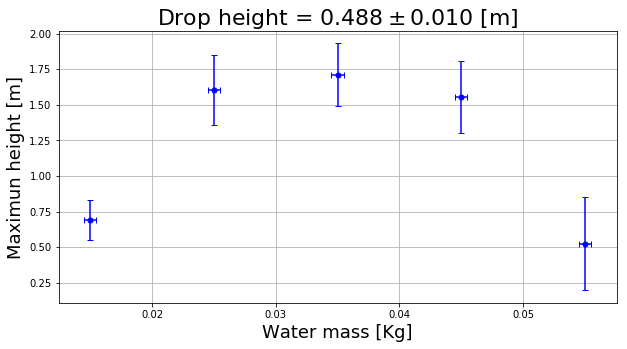

In [15]:
fig = plt.figure(figsize=(10, 5))
plt.title("Drop height = $0.488 \pm 0.010 $ [m]", fontsize = 22)
#plt.xlabel("Water height [m]", fontsize = 18)
plt.xlabel("Water mass [Kg]", fontsize = 18)
plt.ylabel("Maximun height [m]", fontsize = 18)
        
(_, caps, _) = plt.errorbar(agua, average, yerr = dev, xerr= 0.0005 , color='blue', fmt='o', markersize=5, capsize=3)

for cap in caps:
    cap.set_markeredgewidth(1)

#xhc = np.linspace(0.02, 0.14, 100)
#fit = exceso(xhc,poptexc[0],poptexc[1],poptexc[2],poptexc[3],poptexc[4])
#fitrec = recta(xhc,poptrec[0],poptrec[1])
#resta = fitrec - fit
#fitexp = exponencial(xhc,poptexp[0],poptexp[1],poptexp[2],poptexp[3])

#plt.plot(xhc, fit, marker ='',linestyle='-',markersize =12, label='Real Data')
#plt.plot(xhc, fitrec, marker ='',linestyle='-',markersize =12, label='Rect Line')
#plt.plot(xhc, resta, marker ='',linestyle='--',markersize =12, label='Subtraction')
#plt.plot(xhc, fitexp, marker ='',linestyle='--',markersize =12, label='Subtraction')
    
plt.grid()
#plt.legend()
plt.show()

In [16]:
#Energía potencial inicial

Ep15 = Altura_agua_15[:,4]*(Altura_agua_15[:,6]+Altura_agua_15[:,7]+0.001)*9.8
Ep25 = Altura_agua_25[:,4]*(Altura_agua_25[:,6]+Altura_agua_25[:,7]+0.001)*9.8
Ep35 = Altura_agua_35[:,4]*(Altura_agua_35[:,6]+Altura_agua_35[:,7]+0.001)*9.8
Ep45 = Altura_agua_45[:,4]*(Altura_agua_45[:,6]+Altura_agua_45[:,7]+0.001)*9.8
Ep55 = Altura_agua_55[:,4]*(Altura_agua_55[:,6]+Altura_agua_55[:,7]+0.001)*9.8

#Energía cinética final

Ec15 = (1/2.)*0.001*((Altura_agua_15[:,0]/(Altura_agua_15[:,3]-Altura_agua_15[:,2]))**2+(2*9.8*(Altura_agua_15[:,1]-0.037/2.-Altura_agua_15[:,5])))
Ec25 = (1/2.)*0.001*((Altura_agua_25[:,0]/(Altura_agua_25[:,3]-Altura_agua_25[:,2]))**2+(2*9.8*(Altura_agua_25[:,1]-0.037/2.-Altura_agua_25[:,5])))
Ec35 = (1/2.)*0.001*((Altura_agua_35[:,0]/(Altura_agua_35[:,3]-Altura_agua_35[:,2]))**2+(2*9.8*(Altura_agua_35[:,1]-0.037/2.-Altura_agua_35[:,5])))
Ec45 = (1/2.)*0.001*((Altura_agua_45[:,0]/(Altura_agua_45[:,3]-Altura_agua_45[:,2]))**2+(2*9.8*(Altura_agua_45[:,1]-0.037/2.-Altura_agua_45[:,5])))
Ec55 = (1/2.)*0.001*((Altura_agua_55[:,0]/(Altura_agua_55[:,3]-Altura_agua_55[:,2]))**2+(2*9.8*(Altura_agua_55[:,1]-0.037/2.-Altura_agua_55[:,5])))

#Energía cinética en x final

Ecx15 = (1/2.)*0.001*((Altura_agua_15[:,0]/(Altura_agua_15[:,3]-Altura_agua_15[:,2]))**2)
Ecx25 = (1/2.)*0.001*((Altura_agua_25[:,0]/(Altura_agua_25[:,3]-Altura_agua_25[:,2]))**2)
Ecx35 = (1/2.)*0.001*((Altura_agua_35[:,0]/(Altura_agua_35[:,3]-Altura_agua_35[:,2]))**2)
Ecx45 = (1/2.)*0.001*((Altura_agua_45[:,0]/(Altura_agua_45[:,3]-Altura_agua_45[:,2]))**2)
Ecx55 = (1/2.)*0.001*((Altura_agua_55[:,0]/(Altura_agua_55[:,3]-Altura_agua_55[:,2]))**2)

#Energía cinética en y final

Ecy15 = (1/2.)*0.001*(2*9.8*(Altura_agua_15[:,1]-0.037/2.-Altura_agua_15[:,5]))
Ecy25 = (1/2.)*0.001*(2*9.8*(Altura_agua_25[:,1]-0.037/2.-Altura_agua_25[:,5]))
Ecy35 = (1/2.)*0.001*(2*9.8*(Altura_agua_35[:,1]-0.037/2.-Altura_agua_35[:,5]))
Ecy45 = (1/2.)*0.001*(2*9.8*(Altura_agua_45[:,1]-0.037/2.-Altura_agua_45[:,5]))
Ecy55 = (1/2.)*0.001*(2*9.8*(Altura_agua_55[:,1]-0.037/2.-Altura_agua_55[:,5]))

porcentaje15 = (Ec15*100)/Ep15
porcentaje25 = (Ec25*100)/Ep25
porcentaje35 = (Ec35*100)/Ep35
porcentaje45 = (Ec45*100)/Ep45
porcentaje55 = (Ec55*100)/Ep55

porcentaje15x = (Ecx15*100)/Ep15
porcentaje25x = (Ecx25*100)/Ep25
porcentaje35x = (Ecx35*100)/Ep35
porcentaje45x = (Ecx45*100)/Ep45
porcentaje55x = (Ecx55*100)/Ep55

porcentaje15y = (Ecy15*100)/Ep15
porcentaje25y = (Ecy25*100)/Ep25
porcentaje35y = (Ecy35*100)/Ep35
porcentaje45y = (Ecy45*100)/Ep45
porcentaje55y = (Ecy55*100)/Ep55

P_E_15 = round(sum(porcentaje15) / float(len(porcentaje15)), 3)
P_E_25 = round(sum(porcentaje25) / float(len(porcentaje25)), 3)
P_E_35 = round(sum(porcentaje35) / float(len(porcentaje35)), 3)
P_E_45 = round(sum(porcentaje45) / float(len(porcentaje45)), 3)
P_E_55 = round(sum(porcentaje55) / float(len(porcentaje55)), 3)

P_E_15x = round(sum(porcentaje15x) / float(len(porcentaje15x)), 3)
P_E_25x = round(sum(porcentaje25x) / float(len(porcentaje25x)), 3)
P_E_35x = round(sum(porcentaje35x) / float(len(porcentaje35x)), 3)
P_E_45x = round(sum(porcentaje45x) / float(len(porcentaje45x)), 3)
P_E_55x = round(sum(porcentaje55x) / float(len(porcentaje55x)), 3)

P_E_15y = round(sum(porcentaje15y) / float(len(porcentaje15y)), 3)
P_E_25y = round(sum(porcentaje25y) / float(len(porcentaje25y)), 3)
P_E_35y = round(sum(porcentaje35y) / float(len(porcentaje35y)), 3)
P_E_45y = round(sum(porcentaje45y) / float(len(porcentaje45y)), 3)
P_E_55y = round(sum(porcentaje55y) / float(len(porcentaje55y)), 3)

dev_energia_15 = round(np.std(porcentaje15, dtype=np.float64), 3)
dev_energia_25 = round(np.std(porcentaje25, dtype=np.float64), 3)
dev_energia_35 = round(np.std(porcentaje35, dtype=np.float64), 3)
dev_energia_45 = round(np.std(porcentaje45, dtype=np.float64), 3)
dev_energia_55 = round(np.std(porcentaje55, dtype=np.float64), 3)

dev_energia_15x = round(np.std(porcentaje15x, dtype=np.float64), 3)
dev_energia_25x = round(np.std(porcentaje25x, dtype=np.float64), 3)
dev_energia_35x = round(np.std(porcentaje35x, dtype=np.float64), 3)
dev_energia_45x = round(np.std(porcentaje45x, dtype=np.float64), 3)
dev_energia_55x = round(np.std(porcentaje55x, dtype=np.float64), 3)

dev_energia_15y = round(np.std(porcentaje15y, dtype=np.float64), 3)
dev_energia_25y = round(np.std(porcentaje25y, dtype=np.float64), 3)
dev_energia_35y = round(np.std(porcentaje35y, dtype=np.float64), 3)
dev_energia_45y = round(np.std(porcentaje45y, dtype=np.float64), 3)
dev_energia_55y = round(np.std(porcentaje55y, dtype=np.float64), 3)

Desviaciones_energia = [dev_energia_15, dev_energia_25, dev_energia_35, dev_energia_45, dev_energia_55]
Porcentajes_energia = [P_E_15, P_E_25, P_E_35, P_E_45, P_E_55]

Desviaciones_energiax = [dev_energia_15x, dev_energia_25x, dev_energia_35x, dev_energia_45x, dev_energia_55x]
Porcentajes_energiax = [P_E_15x, P_E_25x, P_E_35x, P_E_45x, P_E_55x]

Desviaciones_energiay = [dev_energia_15y, dev_energia_25y, dev_energia_35y, dev_energia_45y, dev_energia_55y]
Porcentajes_energiay = [P_E_15y, P_E_25y, P_E_35y, P_E_45y, P_E_55y]

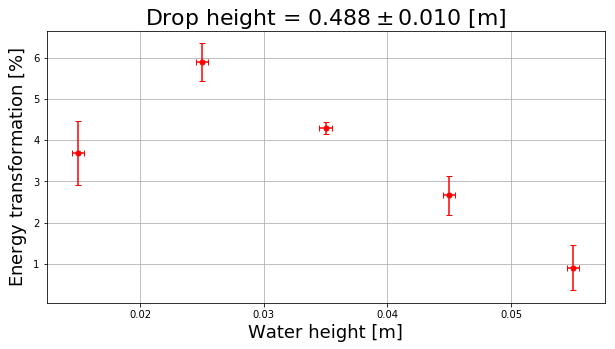

In [18]:
fig = plt.figure(figsize=(10, 5))
plt.title("Drop height = $0.488 \pm 0.010 $ [m]", fontsize = 22)
plt.xlabel("Water height [m]", fontsize = 18)
plt.ylabel("Energy transformation [$\%$]", fontsize = 18)
        
(_, caps, _) = plt.errorbar(agua, Porcentajes_energia, yerr = Desviaciones_energia, xerr= 0.0005 , color='red', fmt='o', markersize=5, capsize=3)
#(_, caps, _) = plt.errorbar(agua, Porcentajes_energiax, yerr = Desviaciones_energiax, xerr= 0.0005 , color='blue', fmt='o', markersize=5, capsize=3)
#(_, caps, _) = plt.errorbar(agua, Porcentajes_energiay, yerr = Desviaciones_energiay, xerr= 0.0005 , color='green', fmt='o', markersize=5, capsize=3)

for cap in caps:
    cap.set_markeredgewidth(1)
        
plt.grid()
#plt.legend()
plt.show()

In [4]:
Altura_agua_15_Grande = np.loadtxt("Altura_agua_VasoGrande/Altura-Agua-1.5_Vasogrande.txt", comments='#')
Altura_agua_25_Grande = np.loadtxt("Altura_agua_VasoGrande/Altura-Agua-2.5_Vasogrande.txt", comments='#')
Altura_agua_35_Grande = np.loadtxt("Altura_agua_VasoGrande/Altura-Agua-3.5_Vasogrande.txt", comments='#')
Altura_agua_45_Grande = np.loadtxt("Altura_agua_VasoGrande/Altura-Agua-4.5_Vasogrande.txt", comments='#')
Altura_agua_55_Grande = np.loadtxt("Altura_agua_VasoGrande/Altura-Agua-5.5_Vasogrande.txt", comments='#')

In [5]:
ymax_15_grande = Altura_agua_15_Grande[:,1]
average_15_grande = round(sum(ymax_15_grande) / float(len(ymax_15_grande)), 3)
dev_15_grande = round(np.std(ymax_15_grande, dtype=np.float64), 3)

agua_15_grande = Altura_agua_15_Grande[:,5]
average_altura_15_grande = round(sum(agua_15_grande) / float(len(agua_15_grande)), 3)
dev_altura_15_grande = round(np.std(agua_15_grande, dtype=np.float64), 3)

ymax_25_grande = Altura_agua_25_Grande[:,1]
average_25_grande = round(sum(ymax_25_grande) / float(len(ymax_25_grande)), 3)
dev_25_grande = round(np.std(ymax_25_grande, dtype=np.float64), 3)

agua_25_grande = Altura_agua_25_Grande[:,5]
average_altura_25_grande = round(sum(agua_25_grande) / float(len(agua_25_grande)), 3)
dev_altura_25_grande = round(np.std(agua_25_grande, dtype=np.float64), 3)

ymax_35_grande = Altura_agua_35_Grande[:,1]
average_35_grande = round(sum(ymax_35_grande) / float(len(ymax_35_grande)), 3)
dev_35_grande = round(np.std(ymax_35_grande, dtype=np.float64), 3)

agua_35_grande = Altura_agua_35_Grande[:,5]
average_altura_35_grande = round(sum(agua_35_grande) / float(len(agua_35_grande)), 3)
dev_altura_35_grande = round(np.std(agua_35_grande, dtype=np.float64), 3)

ymax_45_grande = Altura_agua_45_Grande[:,1]
average_45_grande= round(sum(ymax_45_grande) / float(len(ymax_45_grande)), 3)
dev_45_grande = round(np.std(ymax_45_grande, dtype=np.float64), 3)

agua_45_grande = Altura_agua_45_Grande[:,5]
average_altura_45_grande = round(sum(agua_45_grande) / float(len(agua_45_grande)), 3)
dev_altura_45_grande = round(np.std(agua_45_grande, dtype=np.float64), 3)

ymax_55_grande = Altura_agua_55_Grande[:,1]
average_55_grande = round(sum(ymax_55_grande) / float(len(ymax_55_grande)), 3)
dev_55_grande = round(np.std(ymax_55_grande, dtype=np.float64), 3)

agua_55_grande = Altura_agua_55_Grande[:,5]
average_altura_55_grande = round(sum(agua_55_grande) / float(len(agua_55_grande)), 3)
dev_altura_55_grande = round(np.std(agua_55_grande, dtype=np.float64), 3)

average_grande = [average_15_grande, average_25_grande, average_35_grande, average_45_grande, average_55_grande]
dev_grande = [dev_15_grande, dev_25_grande, dev_35_grande, dev_45_grande, dev_55_grande]
agua_grande = [average_altura_15_grande, average_altura_25_grande, average_altura_35_grande, average_altura_45_grande, average_altura_55_grande]

caida_15_grande = Altura_agua_15_Grande[:,4]
caida_25_grande = Altura_agua_25_Grande[:,4]
caida_35_grande = Altura_agua_35_Grande[:,4]
caida_45_grande = Altura_agua_45_Grande[:,4]
caida_55_grande = Altura_agua_55_Grande[:,4]

#masa_agua = [0.034,0.054,0.080,0.107,0.140]

average_caida_grande = round(((sum(caida_15_grande)/float(len(caida_15_grande)))+(sum(caida_25_grande)/float(len(caida_25_grande)))+(sum(caida_35_grande)/float(len(caida_35_grande)))+(sum(caida_45_grande)/float(len(caida_45_grande)))+(sum(caida_55_grande)/float(len(caida_55_grande))))/5., 3)
promedios_grande = [sum(caida_15_grande)/float(len(caida_15_grande)),sum(caida_25_grande)/float(len(caida_25_grande)),sum(caida_35_grande)/float(len(caida_35_grande)), sum(caida_45_grande)/float(len(caida_45_grande)), sum(caida_55_grande)/float(len(caida_55_grande))]
desviacion_grande = round(np.std(promedios_grande, dtype=np.float64), 3)

print average_caida_grande, desviacion_grande

0.486 0.014


In [30]:
mv = 0.005
mp = 0.001

[-0.36990831 -0.42074003  0.09167487]
[ 0.17952997  1.62264573  0.34097753 53.2030141  -1.7797729 ]
[ 1.60202036e-02  9.56135853e+01 -1.88996827e-01]


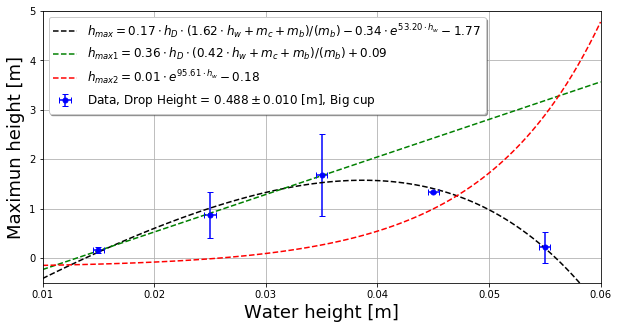

In [38]:
def exceso_1(x,a,b,c,d,e):
    return  b*np.power(x,3) + c*np.power(x,2) + d*x + e
poptexc_1, pcovexc_1 = curve_fit(exceso_1, agua_grande, average_grande, [1,1,1,1,1])

def recta_1(x, d, e, f):
    return  d*0.488*(e*x+mv+mp)/mp + f
poptrec_1, pcovrec_1 = curve_fit(recta_1, [agua_grande[0],agua_grande[1],agua_grande[2]], [average_grande[0],average_grande[1],average_grande[2]], [1,1,1])
print(poptrec_1)


def exponencial_1 (x,a,b,c,d,e):
    return a*0.488*(b*x+mv+mp)/mp - c*np.exp(d*x) + e
poptexp_1, pcovexp_1 = curve_fit(exponencial_1, agua_grande, average_grande, [10,10,10,100,10])
print(poptexp_1)

xhc_1 = np.linspace(0.01, 0.06, 100)
fit_1 = exceso_1(xhc_1,poptexc_1[0],poptexc_1[1],poptexc_1[2],poptexc_1[3],poptexc_1[4])
fitrec_1 = recta_1(xhc_1,poptrec_1[0],poptrec_1[1],poptrec_1[2])
resta_1 = fitrec_1 - fit_1
fitexp_1 = exponencial_1(xhc_1,poptexp_1[0],poptexp_1[1],poptexp_1[2],poptexp_1[3],poptexp_1[4])

def exponencial_2 (x,f,h,g):
    return f*np.exp(h*x) + g
poptexp_2, pcovexp_2 = curve_fit(exponencial_2, xhc_1, resta_1,[1,1,1])
print(poptexp_2)
fitexp_2 = exponencial_2(xhc_1,poptexp_2[0],poptexp_2[1],poptexp_2[2])

fig = plt.figure(figsize=(10, 5))
plt.xlabel("Water height [m]", fontsize = 18)
plt.ylabel("Maximun height [m]", fontsize = 18)

plt.plot(xhc_1, fitexp_1, marker ='',linestyle='--', color = 'k', markersize =12, label='$h_{max} = 0.17\cdot h_D\cdot(1.62\cdot h_w+m_c+m_b)/(m_b)-0.34\cdot e^{53.20\cdot h_w}-1.77$')
plt.plot(xhc_1, fitrec_1, marker ='',linestyle='--', color = 'g',markersize =12, label='$h_{max1} = 0.36\cdot h_D\cdot(0.42\cdot h_w+m_c+m_b)/(m_b) + 0.09$')
plt.plot(xhc_1, fitexp_2, marker ='',linestyle='--', color = 'r',markersize =12, label='$h_{max2} = 0.01\cdot e^{95.61\cdot h_w}-0.18$')
(_, caps, _) = plt.errorbar(agua_grande, average_grande, yerr = dev_grande, xerr= 0.0005 , color='blue', fmt='o', markersize=5, capsize=3, label = 'Data, Drop Height = $0.488 \pm 0.010$ [m], Big cup')

for cap in caps:
    cap.set_markeredgewidth(1)
        
plt.grid()
plt.legend(loc='upper left', fontsize = 12, shadow=True)
plt.axis([0.01, 0.06, -0.5, 5])
plt.show()

In [39]:
#Energía potencial inicial

Ep15_g = Altura_agua_15_Grande[:,4]*(Altura_agua_15_Grande[:,6]+Altura_agua_15_Grande[:,7]+0.001)*9.8
Ep25_g = Altura_agua_25_Grande[:,4]*(Altura_agua_25_Grande[:,6]+Altura_agua_25_Grande[:,7]+0.001)*9.8
Ep35_g = Altura_agua_35_Grande[:,4]*(Altura_agua_35_Grande[:,6]+Altura_agua_35_Grande[:,7]+0.001)*9.8
Ep45_g = Altura_agua_45_Grande[:,4]*(Altura_agua_45_Grande[:,6]+Altura_agua_45_Grande[:,7]+0.001)*9.8
Ep55_g = Altura_agua_55_Grande[:,4]*(Altura_agua_55_Grande[:,6]+Altura_agua_55_Grande[:,7]+0.001)*9.8

#Energía cinética final

Ec15_g = (1/2.)*0.001*((Altura_agua_15_Grande[:,0]/(Altura_agua_15_Grande[:,3]-Altura_agua_15_Grande[:,2]))**2+(2*9.8*(Altura_agua_15_Grande[:,1]-0.037/2.-Altura_agua_15_Grande[:,5])))
Ec25_g = (1/2.)*0.001*((Altura_agua_25_Grande[:,0]/(Altura_agua_25_Grande[:,3]-Altura_agua_25_Grande[:,2]))**2+(2*9.8*(Altura_agua_25_Grande[:,1]-0.037/2.-Altura_agua_25_Grande[:,5])))
Ec35_g = (1/2.)*0.001*((Altura_agua_35_Grande[:,0]/(Altura_agua_35_Grande[:,3]-Altura_agua_35_Grande[:,2]))**2+(2*9.8*(Altura_agua_35_Grande[:,1]-0.037/2.-Altura_agua_35_Grande[:,5])))
Ec45_g = (1/2.)*0.001*((Altura_agua_45_Grande[:,0]/(Altura_agua_45_Grande[:,3]-Altura_agua_45_Grande[:,2]))**2+(2*9.8*(Altura_agua_45_Grande[:,1]-0.037/2.-Altura_agua_45_Grande[:,5])))
Ec55_g = (1/2.)*0.001*((Altura_agua_55_Grande[:,0]/(Altura_agua_55_Grande[:,3]-Altura_agua_55_Grande[:,2]))**2+(2*9.8*(Altura_agua_55_Grande[:,1]-0.037/2.-Altura_agua_55_Grande[:,5])))

porcentaje15_g = (Ec15_g*100)/Ep15_g
porcentaje25_g = (Ec25_g*100)/Ep25_g
porcentaje35_g = (Ec35_g*100)/Ep35_g
porcentaje45_g = (Ec45_g*100)/Ep45_g
porcentaje55_g = (Ec55_g*100)/Ep55_g

P_E_15_g = round(sum(porcentaje15_g) / float(len(porcentaje15_g)), 3)
P_E_25_g = round(sum(porcentaje25_g) / float(len(porcentaje25_g)), 3)
P_E_35_g = round(sum(porcentaje35_g) / float(len(porcentaje35_g)), 3)
P_E_45_g = round(sum(porcentaje45_g) / float(len(porcentaje45_g)), 3)
P_E_55_g = round(sum(porcentaje55_g) / float(len(porcentaje55_g)), 3)

dev_energia_15_g = round(np.std(porcentaje15_g, dtype=np.float64), 3)
dev_energia_25_g = round(np.std(porcentaje25_g, dtype=np.float64), 3)
dev_energia_35_g = round(np.std(porcentaje35_g, dtype=np.float64), 3)
dev_energia_45_g = round(np.std(porcentaje45_g, dtype=np.float64), 3)
dev_energia_55_g = round(np.std(porcentaje55_g, dtype=np.float64), 3)

Desviaciones_energia_g = [dev_energia_15_g, dev_energia_25_g, dev_energia_35_g, dev_energia_45_g, dev_energia_55_g]
Porcentajes_energia_g = [P_E_15_g, P_E_25_g, P_E_35_g, P_E_45_g, P_E_55_g]

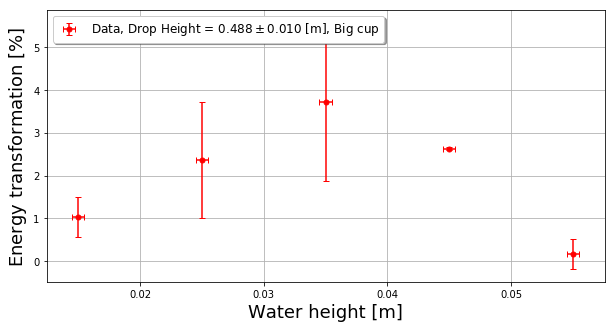

In [42]:
fig = plt.figure(figsize=(10, 5))
#plt.title("Drop height = $0.484 \pm 0.014 $ [m], Big water glass", fontsize = 22)
plt.xlabel("Water height [m]", fontsize = 18)
plt.ylabel("Energy transformation [$\%$]", fontsize = 18)
        
(_, caps, _) = plt.errorbar(agua_grande, Porcentajes_energia_g, yerr = Desviaciones_energia_g, xerr= 0.0005 , color='red', fmt='o', markersize=5, capsize=3, label = 'Data, Drop Height = $0.488 \pm 0.010$ [m], Big cup')

for cap in caps:
    cap.set_markeredgewidth(1)
        
plt.grid()
plt.legend(loc='upper left', fontsize = 12, shadow=True)
plt.show()